In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("dplyr") 

library(glue)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpTjIfyL/downloaded_packages’



## Задание 1 
Рассчитать критерий согласия Пирсона для каждого вида распределения 
## Задание 2 
Рассчитать анаморфозы для каждого вида распределения 


## Задание 1

In [ ]:
%%R
library(dplyr)
table_m_q <- function(x) {
    n <- length(x)
    n_groups <- 1 + floor(log2(n))
    h <- (max(x) - min(x))/n_groups
    z <- seq(from=min(x), to=max(x), by=h)
    X <- (z[-1]+z[-length(z)])/2
    table_cut <-data.frame(values=x, groups=cut(x, n_groups))
    table_hist <- table_cut %>% dplyr::group_by(groups) %>% dplyr::summarise(abs_freq = n(), rel_freq=n()/n)
    table_hist$low <- round(z[-length(z)], 1)
    table_hist$upp <- round(z[-1], 1)
    table_hist$med <- round(X, 1)
    m <- sum(table_hist$med * table_hist$rel_freq)
    q <- sqrt(sum((table_hist$med - m)^2 * table_hist$rel_freq))
    return (list(table = table_hist, groups = n_groups, mean = m, sd = q))
}

integ_norm <- function(low = -Inf, high = Inf, mean_param = 0, sd_param = 1) {
    unlist (
        integrate(f=dnorm, lower=low, upper=high, mean = mean_param, sd = sd_param, abs.tol = 0)$value
    )
}

chi_test_unif<- function(table_hist) {
    N <- sum(table_hist$abs_freq)
    pract <- table_hist$abs_freq 
    theor <- numeric(nrow(table_hist)) 
    mean <- sum(table_hist$med*table_hist$abs_freq)/N
    D <- sum(table_hist$abs_freq*(table_hist$med-mean)^2)/N
    sd <- sqrt(D)
    a <- mean - sqrt(3)*sd
    b <- mean + sqrt(3)*sd 
    f <- 1/(b-a)
    for (i in 1:nrow(table_hist)) {
        if (i == 1) {
          theor[i] <- N*f*(table_hist$upp[i]-a)
        }
        if (i == nrow(table_hist)) {
          theor[i] <- N*f*(b - table_hist$low[i])
        }
        if (i != 1 & i != nrow(table_hist)) {
          theor[i] <- N*f*(table_hist$med[i] - table_hist$med[i-1])   
        }
    }
    chi <- sum((pract - theor)^2 / theor)
    return (chi)
}

chi_test_exp <- function(table_hist) {
    N <- sum(table_hist$abs_freq)
    pract <- table_hist$abs_freq  
    theor <- numeric(nrow(table_hist)) 
    mean <- sum(table_hist$med*table_hist$abs_freq)/N
    lamb <- 1/mean
    for (i in 1:nrow(table_hist)) {
      theor[i]<-N*(exp(-lamb*table_hist$low[i])-exp(-lamb*table_hist$upp[i]))
    }
    chi <- sum((pract - theor)^2 / theor)
    return (chi)
}


chi_test_norm <- function(table_hist, mean_p = 0, sd_p = 0) {
    N <- sum(table_hist$abs_freq)
    pract <- table_hist$abs_freq 
    theor <- numeric(nrow(table_hist)) 
    for (i in 1:nrow(table_hist)) {
        theor[i] <- N * (integ_norm(high=table_hist$upp[i], mean_param = mean_p, sd_param = sd_p) - integ_norm(high=table_hist$low[i], mean_param = mean_p, sd_param = sd_p))
    }
    chi <- sum((pract - theor)^2 / theor)
    return (chi)
}

In [ ]:
%%R
one <- as.numeric(unlist(read.table('1.txt')))
table_hist_one <- table_m_q(one)$table
mean_one <- table_m_q(one)$mean
sd_one <- table_m_q(one)$sd
groups_one <- table_m_q(one)$groups

four <- as.numeric(unlist(read.table('4.txt')))
table_hist_four <- table_m_q(four)$table
mean_four <- table_m_q(four)$mean
sd_four <- table_m_q(four)$sd
groups_four <- table_m_q(four)$groups

In [ ]:
%%R
chi_test_one <- chi_test_norm(table_hist=table_hist_one, mean_p = mean_one, sd_p = sd_one)
chi_test_four <- chi_test_norm(table_hist=table_hist_four, mean_p = mean_four, sd_p = sd_four)
glue("{chi_test_one} {qchisq(p=0.975, df=groups_one - 2 -1)}\n{chi_test_four} {qchisq(p=0.975, df=groups_four - 2 -1)}")

2.24390796692521 9.34840360449614
1.99651422825041 12.83250199403
FALSE


In [ ]:
%%R
chi_test_one <- chi_test_exp(table_hist_one)
chi_test_four <- chi_test_exp(table_hist_four)
glue("{chi_test_one} {qchisq(p=0.975, df=groups_one - 2 -1)}\n{chi_test_four} {qchisq(p=0.975, df=groups_four - 2 -1)}")

-1.42756404542903e+20 9.34840360449614
-9430.30750586111 12.83250199403
FALSE


In [ ]:
%%R
two <- as.numeric(unlist(read.table('2.txt')))
table_hist_two <- table_m_q(two)$table
mean_two <- table_m_q(two)$mean
sd_two <- table_m_q(two)$sd
groups_two <- table_m_q(two)$groups

five <- as.numeric(unlist(read.table('5.txt')))
table_hist_five <- table_m_q(five)$table
mean_five <- table_m_q(five)$mean
sd_five <- table_m_q(five)$sd
groups_five <- table_m_q(five)$groups

In [ ]:
%%R
chi_test_two <- chi_test_unif(table_hist_two)
chi_test_five <- chi_test_unif(table_hist_five)
glue("{chi_test_two} {qchisq(p=0.975, df=groups_two - 2 -1)}\n{chi_test_four} {qchisq(p=0.975, df=groups_five - 2 -1)}")

3.47401175453544 9.34840360449614
-9430.30750586111 12.83250199403
FALSE


In [ ]:
%%R
chi_test_two <- chi_test_exp(table_hist=table_hist_two)
glue("{chi_test_two} {qchisq(p=0.975, df=groups_two - 2 -1)}")

452627.881304894 9.34840360449614
FALSE


In [ ]:
%%R
chi_test_five <- chi_test_norm(table_hist=table_hist_five, mean_p = mean_five, sd_p = sd_five)
glue("{chi_test_five} {qchisq(p=0.975, df=groups_five - 2 -1)}")

39.6169140522773 12.83250199403
FALSE


In [ ]:
%%R
three <- as.numeric(unlist(read.table('3.txt')))
n <- length(three)
n_groups <- 1 + floor(log2(n))
h <- (max(three) - min(three))/n_groups
z <- seq(from=min(three), to=max(three), by=h)
X <- (z[-1]+z[-length(z)])/2
table_cut <-data.frame(values=three, groups=cut(three, n_groups+1))
table_hist_three <- table_cut %>% dplyr::group_by(groups) %>% dplyr::summarise(abs_freq = n(), rel_freq=n()/n)
table_hist_three$low <- round(z[-length(z)], 1)
table_hist_three$upp <- round(z[-1], 1)
table_hist_three$med <- round(X, 1)
mean_three <- sum(table_hist_three$med * table_hist_three$rel_freq)
sd_three <- sqrt(sum((table_hist_three$med - mean_three)^2 * table_hist_three$rel_freq)) 

six <- as.numeric(unlist(read.table('6.txt')))
table_hist_six <- table_m_q(six)$table
mean_six <- table_m_q(six)$mean
sd_six <- table_m_q(six)$sd
groups_six <- table_m_q(six)$groups

In [ ]:
%%R
chi_test_three <- chi_test_exp(table_hist_three)
chi_test_six <- chi_test_exp(table_hist_six)
glue("{chi_test_three} {qchisq(p=0.975, df=n_groups - 1 -1)}\n{chi_test_six} {qchisq(p=0.975, df=groups_six - 1 -1)}")

1.92139614058323 11.1432867818778
12.3074123940007 14.4493753354479
FALSE


In [ ]:
%%R
chi_test_three <- chi_test_norm(table_hist=table_hist_three, mean_p = mean_three, sd_p = sd_three)
chi_test_six <- chi_test_norm(table_hist=table_hist_six, mean_p = mean_six, sd_p = sd_six)
glue("{chi_test_three} {qchisq(p=0.975, df=n_groups - 1 -1)}\n{chi_test_six} {qchisq(p=0.975, df=groups_six - 1 -1)}")

15.9366738349764 11.1432867818778
345.906557571979 14.4493753354479
FALSE


## Задание 2

In [ ]:
%%R 
anamorph_norm <- function(table_hist, mean) {
  ln_p <- log(table_hist$rel_freq) 
  x <- (table_hist$med- mean)^2 
  linear_model <- lm(ln_p ~ x) 
  a <- linear_model$coefficients[2] 
  b <- linear_model$coefficients[1] 
  mod_ln_p <- a * x + b 
  R2 <- cor(ln_p, mod_ln_p)^2
  plot(x = x, y = ln_p, col = "red", type = "o", pch = 19, lwd = I(1.2), xlab = "X(i)", ylab = "ln(pi)") 
  abline(a = b, b = a, col = "blue", lwd = I(1.2)) 
  grid()
  return (R2)   
} 
anamorph_exp <- function(table_hist, mean) {
  ln_p <- log(table_hist$rel_freq) 
  x <- table_hist$med
  linear_model <- lm(ln_p ~ x) 
  a <- linear_model$coefficients[2] 
  b <- linear_model$coefficients[1] 
  mod_ln_p <- a * x + b 
  R2 <- cor(ln_p, mod_ln_p)^2
  plot(x = x, y = ln_p, col = "red", type = "o", pch = 19, lwd = I(1.2), xlab = "X(i)", ylab = "ln(pi)") 
  abline(a = b, b = a, col = "blue", lwd = I(1.2)) 
  grid()
  return (R2)   
} 
anamorph_unif <- function(table_hist) {
  ln_p <- cumsum(table_hist$rel_freq)
  x <- table_hist$med
  linear_model <- lm(ln_p ~ x)
  a <- linear_model$coefficients[2] 
  b <- linear_model$coefficients[1]
  mod_ln_p <- a * x + b 
  R2 <- cor(ln_p, mod_ln_p)^2
  plot(x = x, y = ln_p, col = "red", pch = 19, lwd = I(1.2), xlab = "X(i)", ylab = "ln(pi)") 
  abline(a = b, b = a, col = "blue") 
  grid()
  return (R2)   
} 

[1] 0.87945634 0.43488902 0.71831787 0.97460854 0.02031969 0.43506842


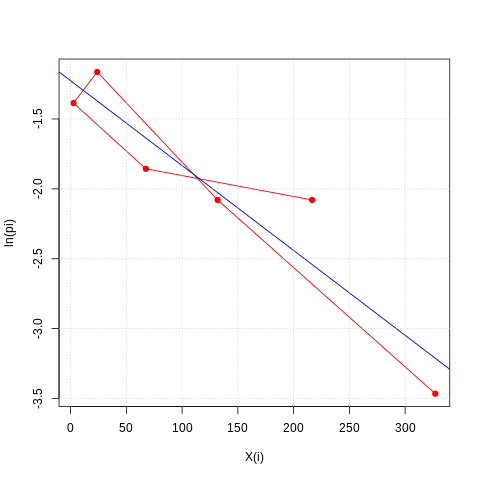

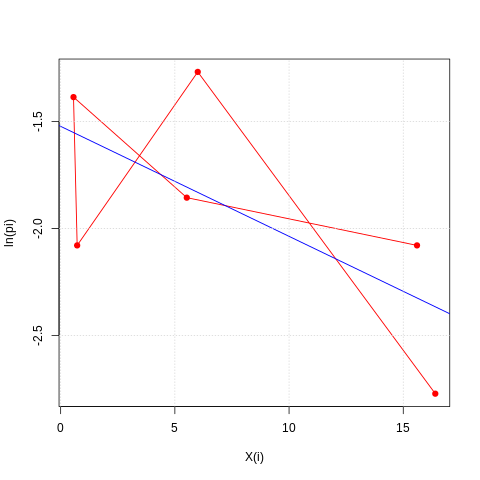

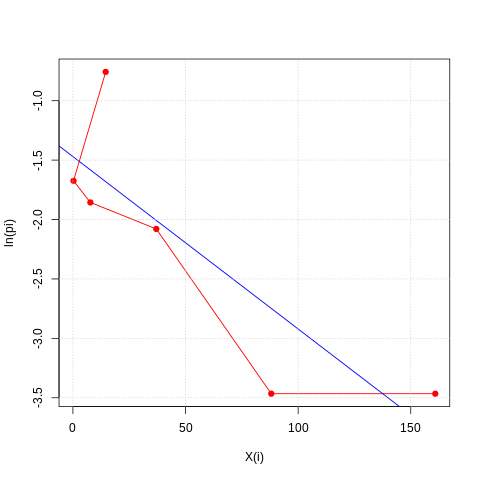

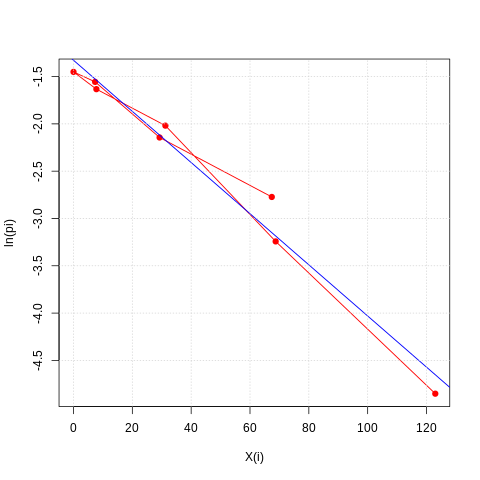

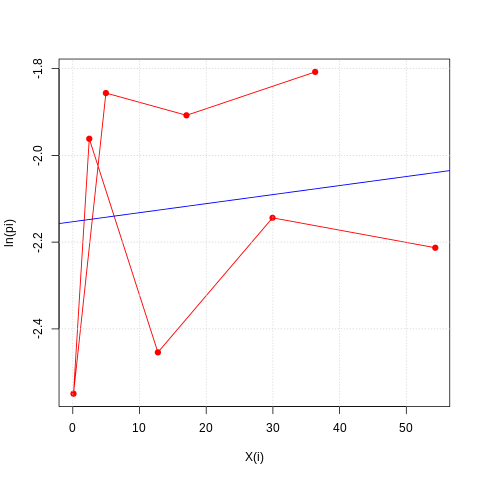

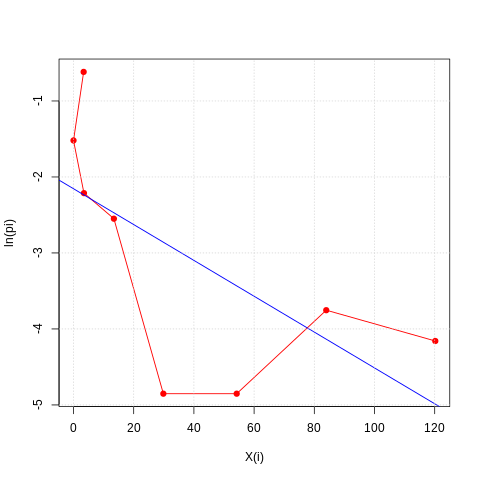

In [ ]:
%%R 
R2_one <- anamorph_norm(table_hist_one, mean_one)
R2_two <- anamorph_norm(table_hist_two, mean_two)
R2_three <- anamorph_norm(table_hist_three, mean_three)
R2_four <- anamorph_norm(table_hist_four, mean_four)
R2_five <- anamorph_norm(table_hist_five, mean_five)
R2_six <- anamorph_norm(table_hist_six, mean_six)
c(R2_one, R2_two, R2_three, R2_four, R2_five, R2_six)

[1] 0.24032913 0.05501619 0.91927789 0.30103102 0.29996588 0.72818670


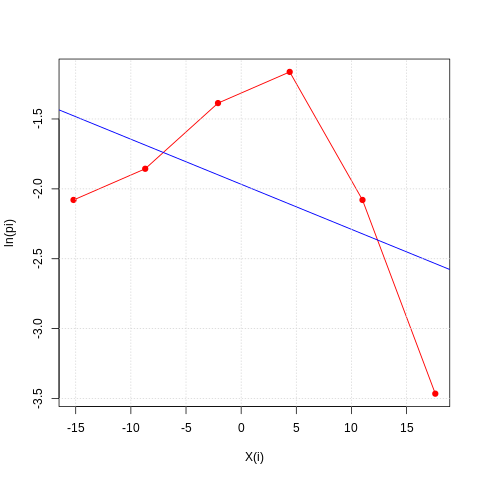

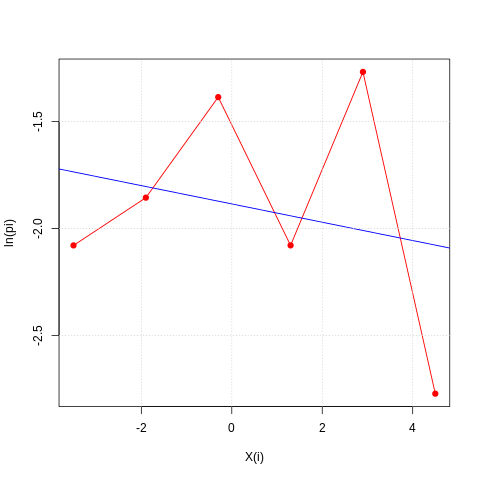

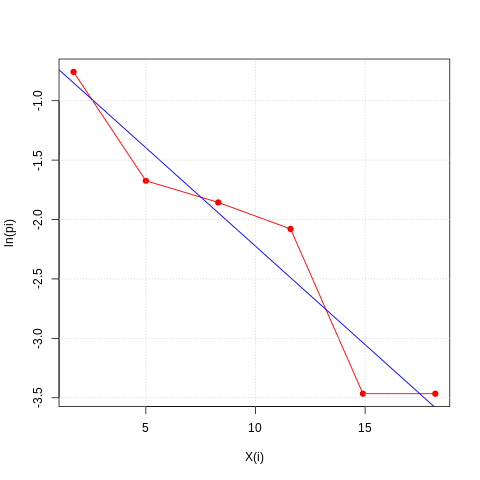

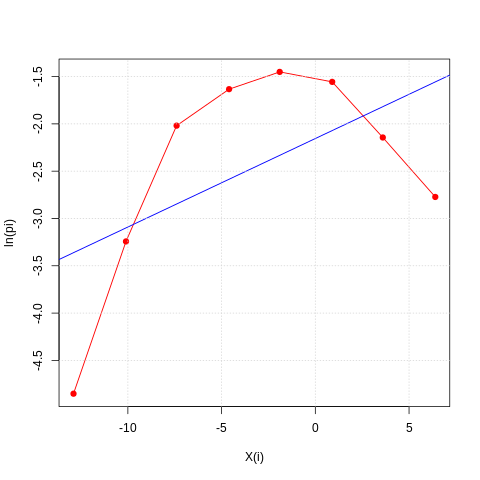

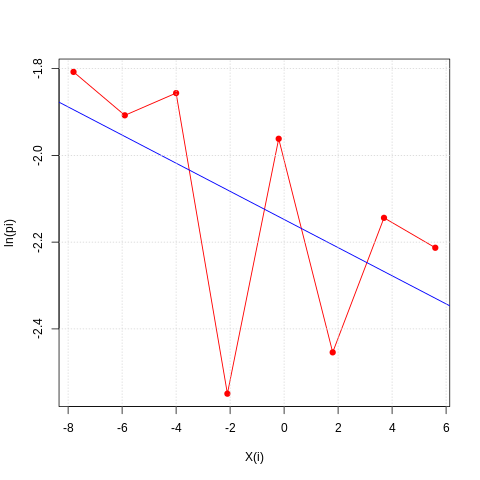

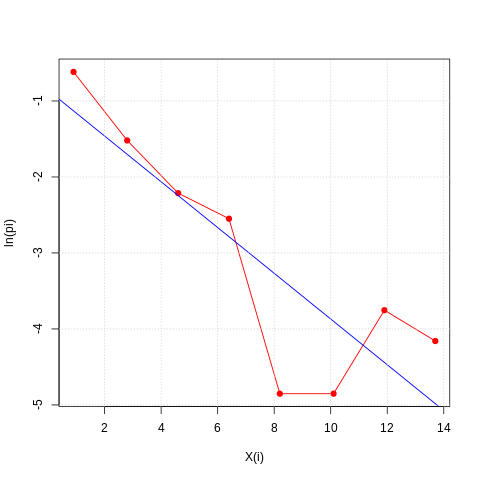

In [ ]:
%%R 
R2_one <- anamorph_exp(table_hist_one, mean_one)
R2_two <- anamorph_exp(table_hist_two, mean_two)
R2_three <- anamorph_exp(table_hist_three, mean_three)
R2_four <- anamorph_exp(table_hist_four, mean_four)
R2_five <- anamorph_exp(table_hist_five, mean_five)
R2_six <- anamorph_exp(table_hist_six, mean_six)
c(R2_one, R2_two, R2_three, R2_four, R2_five, R2_six)

[1] 0.9514041 0.9828128 0.9078534 0.9746028 0.9934683 0.7464897


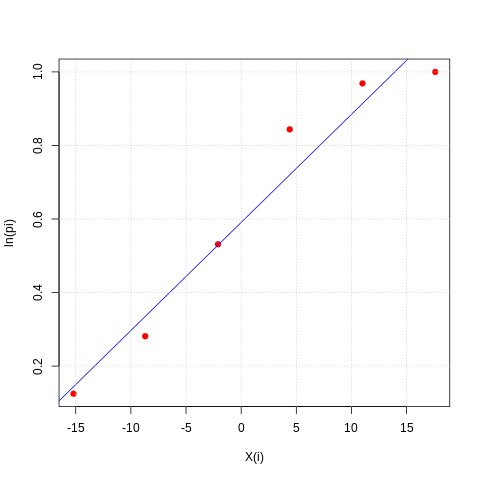

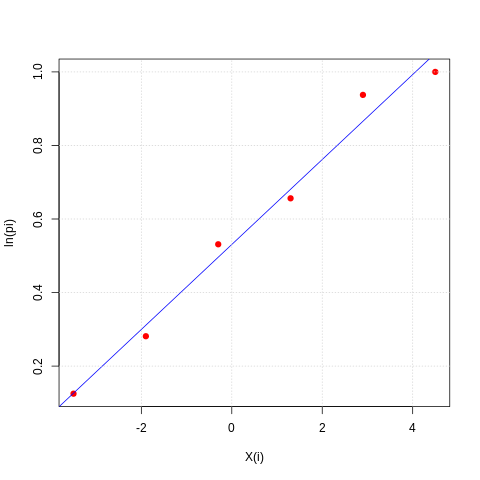

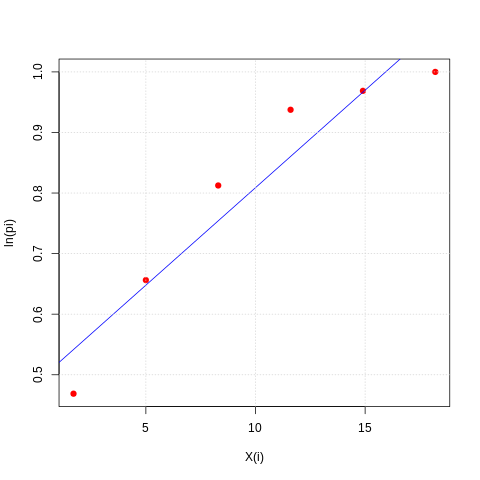

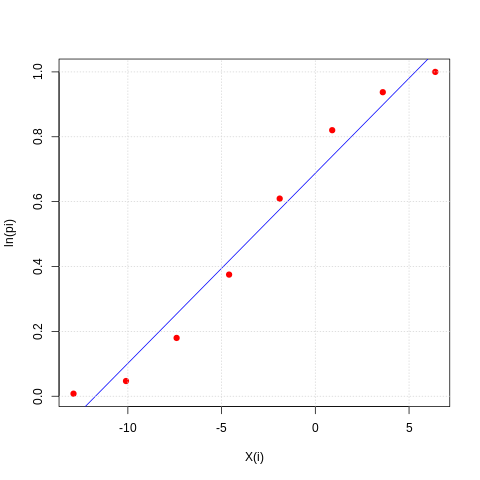

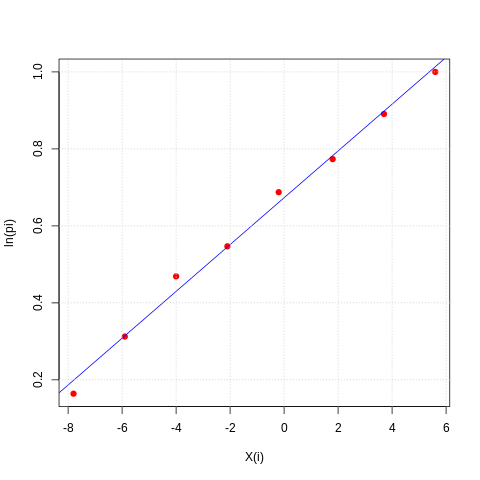

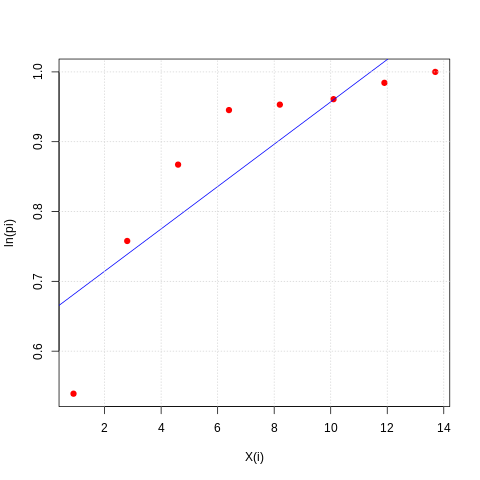

In [ ]:
%%R 
R2_one <- anamorph_unif(table_hist_one)
R2_two <- anamorph_unif(table_hist_two)
R2_three <- anamorph_unif(table_hist_three)
R2_four <- anamorph_unif(table_hist_four)
R2_five <- anamorph_unif(table_hist_five)
R2_six <- anamorph_unif(table_hist_six)
c(R2_one, R2_two, R2_three, R2_four, R2_five, R2_six)